<a href="https://colab.research.google.com/github/othoni-hub/ECG1/blob/main/20220427_TP_VA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Écrire une fonction "def nombre_diviseurs(n):" qui reçoit un nombre entier et retourne le nombre de ses diviseurs.
(on pourra utiliser la fonction % permettant de donner le reste de la division d'un entier par un autre.)

In [ ]:
def nombre_diviseurs(n):
    # on divise n par tous les entiers de 1 à n
    # et on compte le nombre de fois où le reste est 0
    compteur = 0
    for i in range(1,n+1) :
        if n%i == 0 :
            compteur = compteur + 1
    return compteur


In [ ]:
nombre_diviseurs(10)

4

Lancer dé 20 faces : univers : ensemble des entiers de 1 à 20

In [ ]:
Omega = set(range(1,21))
Omega

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}

In [ ]:
len(Omega)

20

* **événements**

En choisissant le bon type de variables,
- fabriquer l'événement A : "La face est paire"
- fabriquer l'événement B : "La face obtenue est un nombre premier"
(rappel : un nombre entier est "premier" lorsqu'il a exactement deux diviseurs : 1 et lui-même. 1 n'est pas premier.)

In [ ]:
# ensemble des résultats pair : algorithmiquement
A = set({})
for element in Omega :
    if element%2 == 0:
        A.add(element)

A

{2, 4, 6, 8, 10, 12, 14, 16, 18, 20}

In [ ]:
Omega.difference(A)

{1, 3, 5, 7, 9, 11, 13, 15, 17, 19}

In [ ]:
# ensemble des résultats pairs par compréhension

A = set([element for element in Omega if element%2 == 0])
A

{2, 4, 6, 8, 10, 12, 14, 16, 18, 20}

In [ ]:
# ensemble des nombres premiers

B = set([element for element in Omega if nombre_diviseurs(element) == 2])
B

{2, 3, 5, 7, 11, 13, 17, 19}

probabilité associée : **équiprobabilité** (chaque face a $\frac {1}{20}$ chance d'apparaître)

* **Probabilité d'un événement**
Dans cette situation, comment se calcule la probabilité d'un événement ?
Pourquoi ?
--> nombre de cas favorables sur nombre de cas possibles

Écrire la fonction "def P(E):" recevant un événement E et retournant sa probablité.

In [ ]:
def P(E):
    # retourne la probabilité d'un événement
    return len(E)/len(Omega)

In [ ]:
P(A)

0.5

In [ ]:
P(B)

0.4

* **Variable aléatoire**

À chaque élément, on associe son nombre de diviseurs

In [ ]:
X = { element : nombre_diviseurs(element) for element in Omega}
X

{1: 1,
 2: 2,
 3: 2,
 4: 3,
 5: 2,
 6: 4,
 7: 2,
 8: 4,
 9: 3,
 10: 4,
 11: 2,
 12: 6,
 13: 2,
 14: 4,
 15: 4,
 16: 5,
 17: 2,
 18: 6,
 19: 2,
 20: 6}

Univers-image : ensemble des valeurs prises par X

In [ ]:
X_Omega = set (X.values())
X_Omega

NameError: ignored

* **événements associés à X**

[X=k] :  ensemble des issues (de Omega) qui ont k diviseurs

In [ ]:
def X_egal(k) :
    return { element for element in Omega if nombre_diviseurs(element) == k}

In [ ]:
X_egal(3)

{4, 9}

* **loi de X**

À chaque k de X_Omega (clé), on associe (dict) la probabilité de l'événement [X=k] (valeurs)

In [ ]:
loi_de_X = { k :  P(X_egal(k))   for k in X_Omega}
loi_de_X

NameError: ignored

* **représentation graphique**

diagramme en bâtons, avec en abscisse les clés de loi_de_X et en valeurs les values

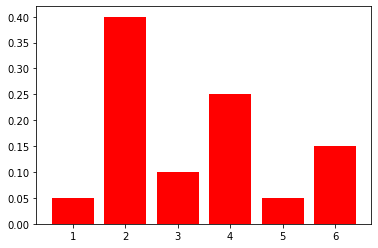

In [ ]:
import matplotlib.pyplot as plt
plt.bar(loi_de_X.keys(),loi_de_X.values(), color = 'red')
plt.show()

* **Espérance**

somme des x_k . p_k
les x_k sont dans X_Omega et les pk dans les values de loi_de_X, soit on les recalcule avec la fonction P

algorithmiquement :

In [ ]:
S = 0
for k in X_Omega :
    S = S + k*P(X_egal(k))

S

3.3000000000000003

In [ ]:
def E(X):
    return sum({k*P(X_egal(k)) for k in X.values()})

In [ ]:
E(X)

3.3000000000000003

In [ ]:
def V(X):
    X2 = { k:X[k]**2 for k in X.keys() }
    return E(X2)-E(X)**2 # formule de Koenig-Huygens

In [ ]:
V(X)

-9.840000000000002